In [1]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
import pandas as pd 

def make_vis(coords,name):
    coords = coords.split()
    ra = coords[0]
    dec = coords[1]
    
    vis = astroplan.FixedTarget(coord=SkyCoord(ra, dec, unit=(u.hourangle, u.degree)),
                                   name=name)
    return vis

%matplotlib inline


/home/dustspeck/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#astroplan.download_IERS_A()
#astropy.utils.iers.IERS_A_URL = 'http://toshi.nofs.navy.mil/ser7/finals2000A.all'
astroplan.download_IERS_A()

In [4]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

In [5]:
observer = astroplan.Observer.at_site('lick')

In [6]:
utdate = '2026-01-27 03:00:00'
today = Time(utdate, scale='utc')
date = '27012026'

In [7]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg eve twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg eve twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
print('12 deg morn twilight', twi12deg.iso)

start  = Time(utdate, scale='utc') 
handoff = Time(utdate, scale='utc') #hand-off to us

12 deg eve twilight 2026-01-27 02:23:54.705
15 deg eve twilight 2026-01-27 02:39:25.482
18 deg eve twilight 2026-01-27 02:54:48.455
18 deg morn twilight 2026-01-27 13:43:19.932
15 deg morn twilight 2026-01-27 13:58:41.506
12 deg morn twilight 2026-01-27 14:14:10.640


In [8]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)03:55:21.7','+09:47:18
#HZ4           = astroplan.FixedTarget(coord=SkyCoord('',unit=(u.hourangle, u.degree)),
#                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522 
LTT6248    = astroplan.FixedTarget(coord=SkyCoord('15:38:59.8', '-28:35:34', unit=(u.hourangle, u.degree)),
                                      name='LTT6248')#V~11.797


Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard

BD64106        =astroplan.FixedTarget(coord=SkyCoord('00:57:36.70',  '+64:51:34.92',unit=(u.hourangle, u.degree)),
                                      name='BD64106')#V~10.23, polarized
HD236633       =astroplan.FixedTarget(coord=SkyCoord('01:09:12.34',  '+60:37:40.92',unit=(u.hourangle, u.degree)),
                                      name='HD236633')#V~9.18, polarized

G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
GD319          =astroplan.FixedTarget(coord=SkyCoord('12:50:05.00',  '+55:06:00.0',unit=(u.hourangle, u.degree)),
                                      name='GD319')#V~12.32, polarized
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)

In [9]:
stds = [Feige34,BD284211,Feige110,G191B2B,HZ44,BD33d2642] # Kast blue standards

#stds = [HD19445,HD84937,BD262606,BD174708,Feige11] # Kast red standards

### Choose Standards for the night

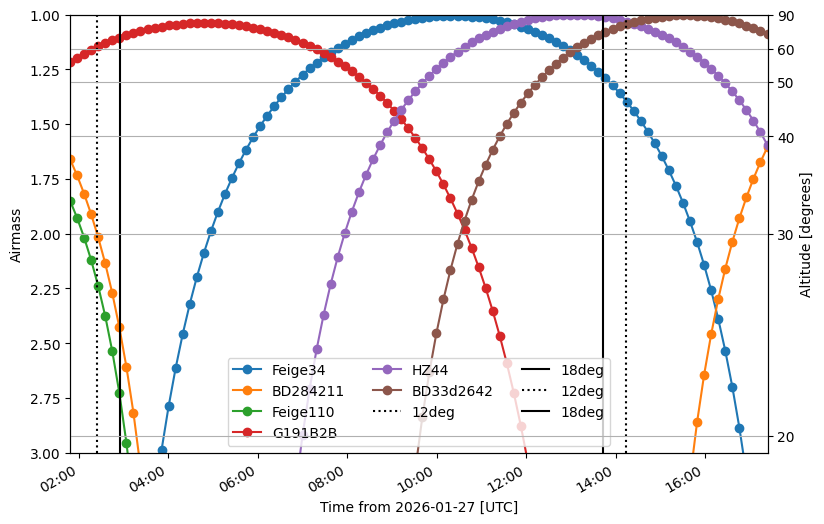

In [10]:
from astropy.utils.iers import conf
conf.auto_max_age = None
# time = today+np.linspace(0, 0.32, 100)
#time = today+np.linspace(-0.1, 0.4, 100)
time = today+np.linspace(-0.05, 0.6, 100)
#plt.figure(figsize=(9,6))
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)

for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle,altitude_yaxis=True,ax=ax)

ax.axvline(pre_twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')

ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')

# plt.axvline(handoff.plot_date, label='handoff', color='k')
ax.legend(ncol=3, loc='lower center')
plt.grid()


In [11]:
chosen_stds = [G191B2B,BD262606]


In [12]:
targetlist = pd.read_csv('Targets_Lick_27Jan2026.dat',delim_whitespace=True,index_col=None,comment='#')
vars = globals()
for row,target in targetlist.iterrows():
    vars[target['target']] = astroplan.FixedTarget(coord=SkyCoord(target['ra'],target['dec'], unit=(u.hourangle, u.degree)),
                                  name=target['target'])

targets = targetlist['target']
targets

0     2025aico
1      2025tis
2     2025advo
3      2024qiw
4     2025abov
5     2025aarn
6      2025zjx
7      2025yth
8      2025pht
9      2025rbs
10     2025mvn
11       2026X
12     2026acd
Name: target, dtype: object

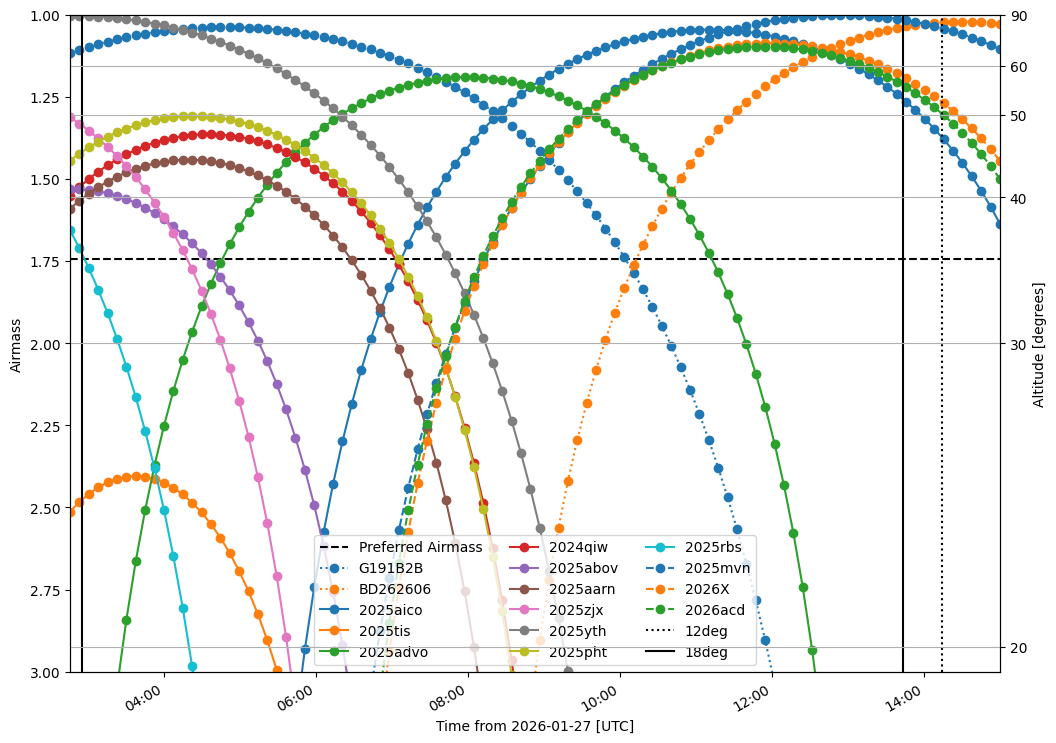

In [13]:
plt.close()
fig = plt.figure(figsize=(12,9))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-35)*u.degree).to(u.radian)), color='k', ls='--', label='Preferred Airmass')
# time = today+np.linspace(-0.05, 0.4, 100)
time = start+np.linspace(-0.01, 0.5, 100)

for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(vars[itarget], observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility_%s.pdf'%date)


In [100]:
blue_std = """
G191B2B     05:05:30.62 +52:49:54.0 11.8 1x240
Feige34     10:39:36.74 +43:06:09.3 11.2 1x180
HZ44        13:23:35.26 +36:07:59.5 11.7 1x240
BD33d2642   15:51:59.86 +32:56:54.8 10.8 1x180
BD284211    21:51:11.02 +28:51:50.4 10.7 1x180
Feige110    23:19:58.00 -05:09:55.8 11.8 1x240
"""

red_std = """
HD19445     03:08:25.86 +26:20:05.7 8.1 1x40
HD84937     09:48:56.09 +13:44:39.3 8.3 1x60
BD262606    14:49:02.35 +25:42:09.1 9.7  1x135
BD174708    22:11:31.37 +18:05:34.2 9.2  1x135
"""

In [37]:

tab ="""buffer      00:00:00    -90:00:00.  99    0x1200
%s          %s          %s          12.0 1x60
2025pht	    04:41:28.87 -02:51:55.8	18.5 7x1200
2024qiw     04:52:54.70 -05:32:04.1	15.0 7x1200
2025advo	08:17:39.89 +04:36:53.1	16.5 2x1200
2025aico	11:29:16.36 +20:35:08.4	16.4 2x1200
2026acd	    12:12:12.75 +13:13:18.4	14.5 3x600
2025mvn     13:13:27.88 +36:35:11.7	19.0 7x1200
%s     %s   %s 9.8  1x140
end     00:00:00     -90:00:00.  99 1x1"""%(chosen_stds[0].name,chosen_stds[0].coord.ra.to_string(),chosen_stds[0].coord.dec.to_string(),\
                                            chosen_stds[1].name,chosen_stds[1].coord.ra.to_string(),chosen_stds[1].coord.dec.to_string())
# 2025tis	    03:55:22.78 -28:09:32.7	18.0 5x1200 
# 2025rbs     22:37:03.66 +34:25:08.0	18.0 5x1200
# 2026X  	    12:18:50.60 +14:24:44.6	17.8 3x1200
# 2025rbs	    22:37:03.66 +34:25:08.0	17.5 5x1200

tab

'buffer      00:00:00    -90:00:00.  99    0x1200\nG191B2B          76d22m39s          52d49m54s          12.0 1x60\n2025pht\t    04:41:28.87 -02:51:55.8\t18.5 7x1200\n2024qiw     04:52:54.70 -05:32:04.1\t15.0 7x1200\n2025advo\t08:17:39.89 +04:36:53.1\t16.5 2x1200\n2025aico\t11:29:16.36 +20:35:08.4\t16.4 2x1200\n2026acd\t    12:12:12.75 +13:13:18.4\t14.5 3x600\n2025mvn     13:13:27.88 +36:35:11.7\t19.0 7x1200\nBD262606     222d15m35.25s   25d42m09.1s 9.8  1x140\nend     00:00:00     -90:00:00.  99 1x1'

In [38]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())
    
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [39]:
#night_start = handoff
night_start = Time(pre_twi15deg.iso) + 0.2*u.hour 
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
    

In [40]:
tbdata['start'] = obs_start[:-1]
tbdata.write('./plan_%s.txt'%date, format='ascii.fixed_width', overwrite=True)
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes13,bytes11,bytes10,bytes10,float64,float64,Time
buffer,00:00:00,-90:00:00.,99,0x1200,0.0,1200.0,2026-01-27 02:51:25.482
G191B2B,76d22m39s,52d49m54s,12.0,1x60,1.0,60.0,2026-01-27 02:53:10.482
2025pht,04:41:28.87,-02:51:55.8,18.5,7x1200,7.0,1200.0,2026-01-27 02:59:10.482
2024qiw,04:52:54.70,-05:32:04.1,15.0,7x1200,7.0,1200.0,2026-01-27 05:43:40.482
2025advo,08:17:39.89,+04:36:53.1,16.5,2x1200,2.0,1200.0,2026-01-27 08:28:10.482
2025aico,11:29:16.36,+20:35:08.4,16.4,2x1200,2.0,1200.0,2026-01-27 09:16:25.482
2026acd,12:12:12.75,+13:13:18.4,14.5,3x600,3.0,600.0,2026-01-27 10:04:40.482
2025mvn,13:13:27.88,+36:35:11.7,19.0,7x1200,7.0,1200.0,2026-01-27 10:46:10.482
BD262606,222d15m35.25s,25d42m09.1s,9.8,1x140,1.0,140.0,2026-01-27 13:30:40.482


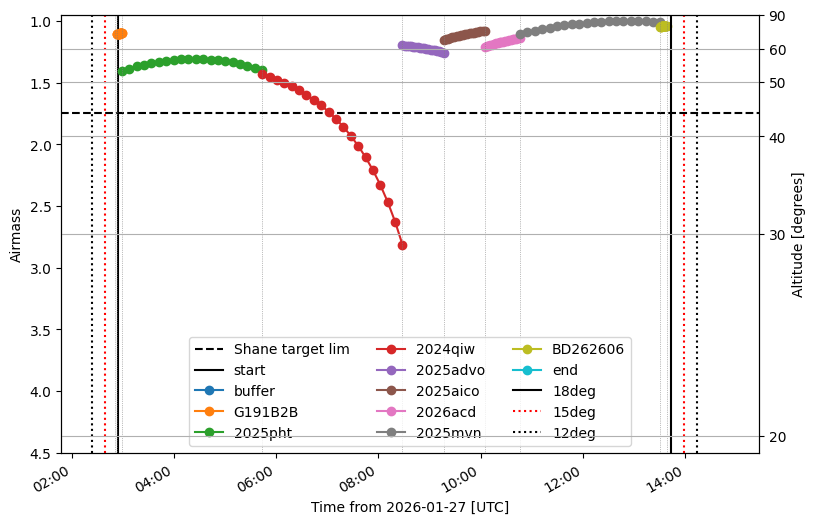

In [41]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-35)*u.degree).to(u.radian)), color='k', ls='--', label='Shane target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
    
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(start.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95,ymin=4.5)
plt.grid()
plt.savefig('schedule_%s.pdf'%date)

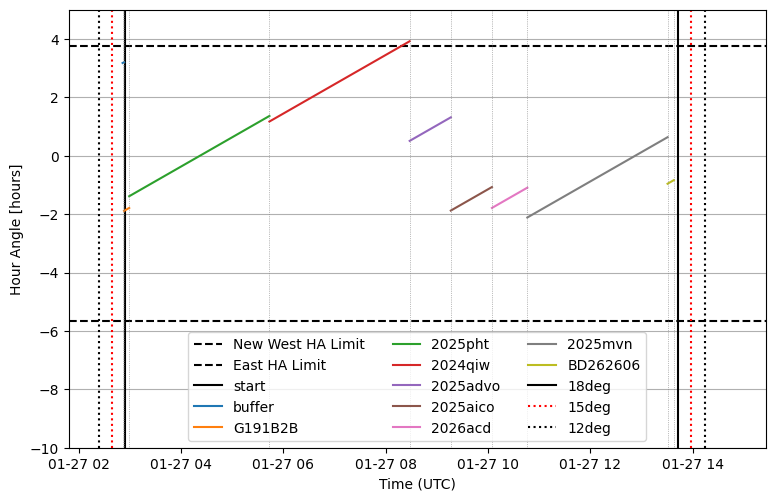

In [42]:
import matplotlib.dates as dates

fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.axhline(3.75, color='k', linestyle='--', label='New West HA Limit')
plt.axhline(-5.67, color='k', linestyle='--', label='East HA Limit')
# time = today+np.linspace(0, 0.32, 100)
last_time = handoff
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')

location = EarthLocation(lat=37.3414*u.deg, lon=-121.6429*u.deg, height=1283*u.m)

for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    if irow['name']=='end':
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
        
    lst = time.sidereal_time('apparent', longitude=location.lon)
    ha = (lst - itarget.ra)
    
    ha_mod = []
    for i in ha.hour:
        if i > 20:
            ha_mod.append(i-24)
        else:
            ha_mod.append(i)
            
    plt.plot(time.datetime,ha_mod,label=irow['name'])

ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(-10,5)
plt.grid(axis='y')
plt.xlabel('Time (UTC)')
plt.ylabel('Hour Angle [hours]')
plt.savefig('schedule_ha.pdf')

# Backup

In [ ]:
tab = """Feige34     10:39:36.74 +43:06:09.3 11.2 1x180
2025gj 	09:44:20.27	-21:16:22.3	17 4x1200
2025cfc     10:29:47.53 +13:00:53.7 16.5 4x1200
2025coe     10:33:07.95 +28:26:13.1 18.3 6x1200
2025fvw	15:35:25.76 	+12:03:28.3	14.7 3x900
2025gjc	15:38:58.11 	-22:40:11.6	18 5x1200
HZ44        13:23:35.26 +36:07:59.5 11.7 1x240
end     00:00:00     -90:00:00.  99 1x1 """


# 2024abbv    00:34:08.89 -30:46:04.6 14.8 3x900
# 2024vfo     01:07:27.38 +39:24:12.9 18.8 6x1200
# 2024wal     02:42:59.46 +11:57:28.3 18.5 6x1200
# buffer      00:00:00    -90:00:00.  99   5x1200 
# 2024iss     12:59:06.14 +28:48:42.5 17.5 4x1200

In [130]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [134]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
Feige34,10:39:36.74,+43:06:09.3,11.2,1x180,1.0,180.0
2025gj,09:44:20.27,-21:16:22.3,17,4x1200,4.0,1200.0
2025cfc,10:29:47.53,+13:00:53.7,16.5,4x1200,4.0,1200.0
2025coe,10:33:07.95,+28:26:13.1,18.3,6x1200,6.0,1200.0
2025fvw,15:35:25.76,+12:03:28.3,14.7,3x900,3.0,900.0
2025gjc,15:38:58.11,-22:40:11.6,18,5x1200,5.0,1200.0
HZ44,13:23:35.26,+36:07:59.5,11.7,1x240,1.0,240.0
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0


In [136]:
night_start = pre_twi15deg
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
tbdata['start'] = obs_start[:-1]
tbdata


name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
Feige34,10:39:36.74,+43:06:09.3,11.2,1x180,1.0,180.0,2460768.655454913
2025gj,09:44:20.27,-21:16:22.3,17,4x1200,4.0,1200.0,2460768.661010469
2025cfc,10:29:47.53,+13:00:53.7,16.5,4x1200,4.0,1200.0,2460768.7268090798
2025coe,10:33:07.95,+28:26:13.1,18.3,6x1200,6.0,1200.0,2460768.792607691
2025fvw,15:35:25.76,+12:03:28.3,14.7,3x900,3.0,900.0,2460768.8906979687
2025gjc,15:38:58.11,-22:40:11.6,18,5x1200,5.0,1200.0,2460768.9299340798
HZ44,13:23:35.26,+36:07:59.5,11.7,1x240,1.0,240.0,2460769.0118785244
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0,2460769.018128524


In [140]:
tbdata.write('./plan_%s_backup.txt'%date, format='ascii.fixed_width', overwrite=True)

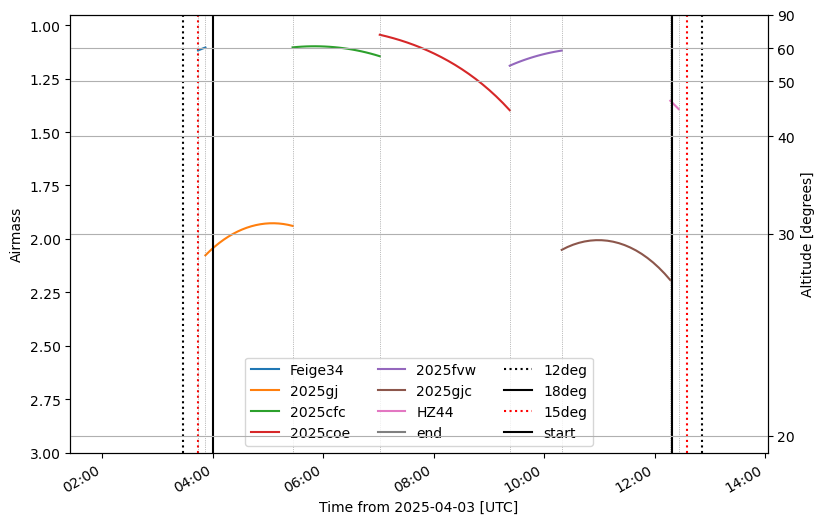

In [138]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
# ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = twi12deg
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_backup.pdf')

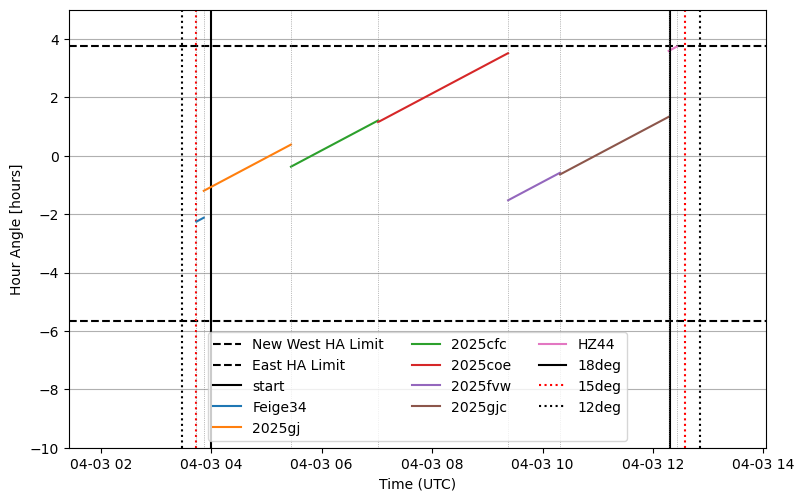

In [139]:

fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.axhline(3.75, color='k', linestyle='--', label='New West HA Limit')
plt.axhline(-5.67, color='k', linestyle='--', label='East HA Limit')
# time = today+np.linspace(0, 0.32, 100)
last_time = handoff
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')

location = EarthLocation(lat=37.3414*u.deg, lon=-121.6429*u.deg, height=1283*u.m)

for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    if irow['name']=='end':
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
        
    lst = time.sidereal_time('apparent', longitude=location.lon)
    ha = (lst - itarget.ra)
    
    ha_mod = []
    for i in ha.hour:
        if i > 20:
            ha_mod.append(i-24)
        else:
            ha_mod.append(i)
            
    plt.plot(time.datetime,ha_mod,label=irow['name'])

ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(-10,5)
plt.grid(axis='y')
plt.xlabel('Time (UTC)')
plt.ylabel('Hour Angle [hours]')
plt.savefig('schedule_ha.pdf')